In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/CASIA2.zip

Streaming output truncated to the last 5000 lines.
  inflating: CASIA2/Tp/Tp_D_NNN_S_B_sec00011_cha00051_00371.tif  
  inflating: CASIA2/Tp/Tp_D_NNN_S_N_ani00016_ani00013_00136.tif  
  inflating: CASIA2/Tp/Tp_D_NNN_S_N_ani10174_ani10173_12454.jpg  
  inflating: CASIA2/Tp/Tp_D_NNN_S_N_ani10179_ani10175_12487.jpg  
  inflating: CASIA2/Tp/Tp_D_NNN_S_N_ani10181_ani10180_12427.jpg  
  inflating: CASIA2/Tp/Tp_D_NNN_S_N_ani10191_ani10200_12436.jpg  
  inflating: CASIA2/Tp/Tp_D_NNN_S_N_ani10193_ani10195_12442.jpg  
  inflating: CASIA2/Tp/Tp_D_NNN_S_N_ani10200_ani10199_12409.jpg  
  inflating: CASIA2/Tp/Tp_D_NNN_S_N_ani20016_ani20017_02059.tif  
  inflating: CASIA2/Tp/Tp_D_NNN_S_N_arc00030_cha00023_00250.tif  
  inflating: CASIA2/Tp/Tp_D_NNN_S_N_arc00059_nat10122_11828.jpg  
  inflating: CASIA2/Tp/Tp_D_NNN_S_N_art00033_cha00063_01421.tif  
  inflating: CASIA2/Tp/Tp_D_NNN_S_N_art00045_cha00023_01409.tif  
  inflating: CASIA2/Tp/Tp_D_NNN_S_N_art00084_cha00026_01390.tif  
  inflating: CASIA2/Tp/Tp

In [4]:
import os
import numpy as np
from PIL import Image, ImageChops, ImageEnhance
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

In [5]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'

    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff

    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    return ela_image
#Function to convert images to ELA form
#Maile tyo default same rakhdeko ho, farak farak experiment garera herna sakincha

In [6]:
main_dataset_path = '/content/CASIA2'

image_height = 256
image_width = 256
batch_size = 32

In [7]:
ela_data_path = 'ela_data'
os.makedirs(ela_data_path, exist_ok=True)

In [8]:
for class_name in os.listdir(main_dataset_path):
    class_path = os.path.join(main_dataset_path, class_name)
    ela_class_path = os.path.join(ela_data_path, class_name)
    os.makedirs(ela_class_path, exist_ok=True)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        if not img_name.lower().endswith(('.jpg', '.jpeg', '.tif', '.tiff')):
            continue

        ela_img = convert_to_ela_image(img_path, quality=90)
        ela_img.save(os.path.join(ela_class_path, img_name.replace('.', '_ela.')), 'PNG')
#ELA perform garera naya directory ma store gareko images for training

KeyboardInterrupt: ignored

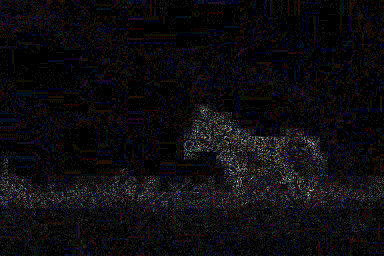

In [ ]:
real_image_path = '/content/ela_data/Au/Au_ani_00001_ela.jpg'
Image.open(real_image_path)

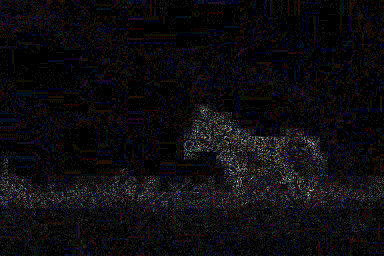

In [ ]:
fake_image_path = '/content/ela_data/Tp/Tp_D_CND_M_N_ani00018_sec00096_00138_ela.tif'
Image.open(real_image_path)
#halka check

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = datagen.flow_from_directory(
    ela_data_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    classes=os.listdir(ela_data_path)
)
#Data loader created

Found 12560 images belonging to 2 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
#CNN architecture for our model
# transfer learning such as resnet ni try garna cha

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_generator, epochs=50)
#compiled and trained

Epoch 1/10
393/393 [==============================] - 86s 185ms/step - loss: 0.4349 - accuracy: 0.8017
Epoch 2/10
393/393 [==============================] - 67s 169ms/step - loss: 0.2675 - accuracy: 0.8903
Epoch 3/10
393/393 [==============================] - 66s 167ms/step - loss: 0.1966 - accuracy: 0.9158
Epoch 4/10
393/393 [==============================] - 66s 168ms/step - loss: 0.1480 - accuracy: 0.9344
Epoch 5/10
393/393 [==============================] - 66s 168ms/step - loss: 0.1175 - accuracy: 0.9503
Epoch 6/10
393/393 [==============================] - 65s 165ms/step - loss: 0.0901 - accuracy: 0.9610
Epoch 7/10
393/393 [==============================] - 65s 165ms/step - loss: 0.0722 - accuracy: 0.9714
Epoch 8/10
393/393 [==============================] - 65s 166ms/step - loss: 0.0566 - accuracy: 0.9781
Epoch 9/10
393/393 [==============================] - 65s 165ms/step - loss: 0.0543 - accuracy: 0.9792
Epoch 10/10
393/393 [==============================] - 67s 171ms/step - l

In [ ]:
model.save('fake_image_detection_model.h5')

In [ ]:
from keras.models import load_model
loaded_model = load_model('/content/fake_image_detection_model.h5')